# Support Vector Machines

## O que são?

Support Vector Machines são modelos de aprendizado de máquina utilizados em grande escala para problemas de classificação, contudo também podem ser aplicados em modelos de regressão.

* Classificação:

    Os modelos SVM buscam um limiar de classificação entre os dados, por exemplo, imaginemos um conjunto de dados dispostos ao longo de um gráfico 2D, onde metade das observações é de "carros" e a outra metade é de "motos". As máquinas de vetor de suporte tentam encontrar um hiperplano que separe estas duas classes. 
    Entre as duas classes deve haver uma margem de separação, quanto maior a margem mais pontos discrepantes são aceitos, quanto menor a margem, menos pontos discrepantes são aceitos

* Regressão:

    Para problemas de regressão, as máquinas de vetor de suporte tentam seguir um padrão de acordo com os dados, quanto maior sua margem mais pontos o vetor utiliza como referência.

### Exemplo de classificação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR, SVC

%matplotlib inline

### Kernel Functions

As funções de Kernel são utilizadas para encontrar os melhores vetores de classificação. O kernel é responsável por rearranjar o conjunto de dados de forma que seja possível encontrar um vetor ideal. As funções são:

* Linear
* Polynomial
* RBF
* Hyperbolic target sigmoid 

Os testes serão feitos baseados no dataset gerado anteriormente

##### Linear

O kernel linear é utilizado quando se tem uma clara linha reta separando duas classes, por exemplo

### Criando classes aleatórias

In [2]:
#A função make_blobs gera classes aleatórias, n_samples = número de amostras, 
#centers = quantidade de centros das classes (deve ser igual ao número de classes)
#cluster_std = desvio padrão dos grupos, n_features = número de classes
#return_centers = retorna o centro de cada classe

from sklearn.datasets.samples_generator import make_blobs 

X, y = make_blobs(n_samples=100, random_state = 6, centers=2, cluster_std=1)
#Retorna X (as posições de cada ponto) e y (a classe de cada ponto)

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


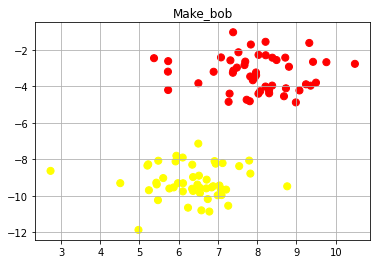

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.grid()
plt.title('Make_bob')
plt.show()

Plotando possíveis linhas de separação

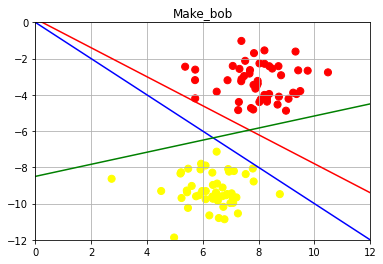

In [4]:
x_line = np.linspace(0,12) #intervalo de X visualizado acima
# Possíveis linhas de separação
y1 = -1*x_line
y2 = -0.8*x_line+0.2
y3 = (1/3) *x_line -8.5

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#plotando linhas
plt.plot(x_line, y1, color='blue')
plt.plot(x_line, y2, color='red')
plt.plot(x_line, y3, color='green')

plt.grid()
plt.title('Make_bob')
plt.xlim(0,12)
plt.ylim(-12,0)
plt.show()

Realizando testes

In [5]:
X_test, y_test = make_blobs(n_samples=500, random_state = 6, centers=2, cluster_std=1)
linear_model = SVC(kernel='linear')
linear_model.fit(X,y)

linear_model.score(X_test,y_test) #A pontuação é

0.998

##### Polynomial

O kernel polinomial é utilizado para computar a relação entre as observações algumas dimensões acima.

Caso não seja possível separar duas classes com uma linha, pode ser necessário transformar a dimensão das obsrvações para conseguir criar um hiperplano entre as classes

Matematicamente a relação entre duas observações _a_ e _b_ em uma dimensão _d_ é denotada por $(a*b+r)^d$, sendo _r_ o coeficiente polinomial

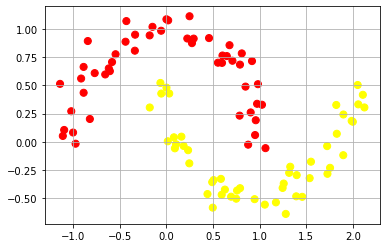

In [11]:
#Criando dataset onde não é possível classificar as classes com uma linha reta
from sklearn.datasets import make_moons

X_pol, y_pol = make_moons(n_samples=100, noise=0.1, random_state=2)
plt.scatter(X_pol[:, 0], X_pol[:, 1], c=y_pol, s=50, cmap='autumn')
plt.grid()

In [20]:
X_test_pol, y_test_pol = make_moons(n_samples=100, noise=0.1, random_state=2)
pol_model = SVC(kernel='poly', degree=5)
pol_model.fit(X_pol,y_pol)

print('Pontuação: ',pol_model.score(X_test_pol,y_test_pol))

Pontuação:  0.93


##### RBF

__Radial Basis Function__ utiliza o __Radial__ kernel, que propõe classificadores em $\infty$ dimensões

Proximidade dos pontos influencia na classificação

Matematicamente a relação entre duas observações _a_ e _b_ é dada por $e^{-\gamma(a-b)^2}$ --- $\gamma$ é um hiperparâmetro ajustável que indica o peso de cada relação (quanto maior $\gamma$ menor a relação entre os pontos _a_ e _b_)

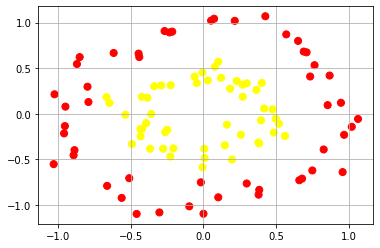

In [21]:
#Criando dataset onde não é possível classificar as classes com uma linha reta
from sklearn.datasets import make_circles

X_rbf, y_rbf = make_circles(n_samples=100, noise=0.1, factor=0.45, random_state=2)
plt.scatter(X_rbf[:, 0], X_rbf[:, 1], c=y_rbf, s=50, cmap='autumn')
plt.grid()

In [25]:
X_test_rbf, y_test_rbf = make_circles(n_samples=500, noise=0.1, factor=0.45, random_state=2)
rbf_model = SVC(kernel='rbf', gamma = 0.5)
rbf_model.fit(X_rbf,y_rbf)

print('Pontuação: ',rbf_model.score(X_test_rbf,y_test_rbf))

Pontuação:  0.998


### Exemplo de Regressão

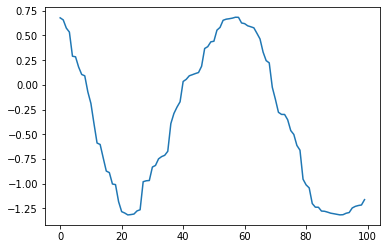

In [78]:
X_reg = np.sort(10 * np.random.rand(100))

Y_reg = np.cos(X_reg)

#Adicionando ruído
Y_reg = Y_reg + 3 * (0.5 - np.random.rand())

plt.plot(np.arange(len(X_reg)),Y_reg)

In [82]:
X_train, X_test = X_reg[:75], X_reg[75:]
Y_train, Y_test = Y_reg[:75], Y_reg[75:]

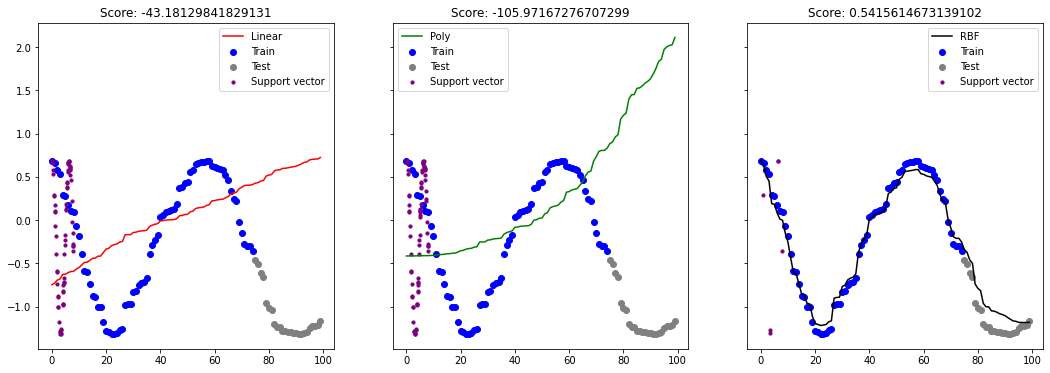

In [102]:
### Criando modelos

lin_svr = SVR(kernel='linear', C=100)
poly_svr = SVR(kernel='poly', C=100, epsilon=.01, degree = 3)
rbf_svr = SVR(kernel='rbf', C=100, epsilon=.1, gamma=0.1)

models = [lin_svr, poly_svr, rbf_svr]
colors = ['red','green','black']
legend = ['Linear', 'Poly', 'RBF']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
for ix, model in enumerate(models):
    
    model_fit = model.fit(X_train.reshape(-1,1),Y_train)
    model_pred = model_fit.predict(X_reg.reshape(-1,1))
    
    ax[ix].scatter(np.arange(len(X_reg))[:75],Y_train, color='blue', label = 'Train')
    ax[ix].scatter(np.arange(len(X_reg))[75:],Y_test, color='gray', label = 'Test')
    
    ax[ix].plot(model_pred, color=colors[ix], label=legend[ix])
    
    ax[ix].scatter(X_reg[model.support_], Y_reg[model.support_], color='purple', s=10, label='Support vector')
    
    ax[ix].legend()
    ax[ix].set_title('Score: {}'.format(model_fit.score(X_test.reshape(-1,1), Y_test)))
    

### Aplicação em série temporal

#### Prevendo valores das ações do Facebook baseado em 5 dias anteriores

In [4]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 6, 1)
start = dt.datetime(2019, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)
df.to_csv('FB.csv')

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

df.head()

,Close 0
0,135.679993
1,131.740005
2,137.949997
3,138.050003
4,142.529999


In [5]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,5)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4
4,142.529999,138.050003,137.949997,131.740005,135.679993
5,144.229996,142.529999,138.050003,137.949997,131.740005
6,144.199997,144.229996,142.529999,138.050003,137.949997
7,143.800003,144.199997,144.229996,142.529999,138.050003
8,145.389999,143.800003,144.199997,144.229996,142.529999


In [8]:
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

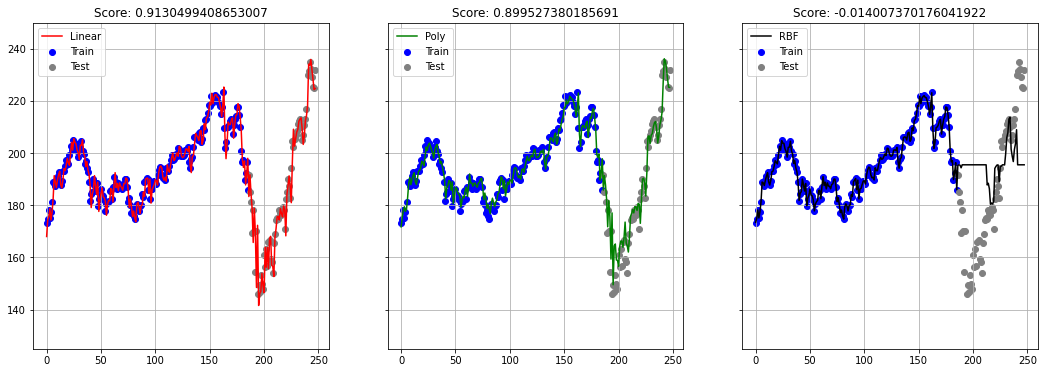

In [240]:
### **** Criando modelos ****

#Modelos
lin_svr = SVR(kernel='linear', C=100)
poly_svr = SVR(kernel='poly', C=100, degree=2)
rbf_svr = SVR(kernel='rbf', C=100, gamma=0.1)

svr = [lin_svr, poly_svr, rbf_svr]
color = ['red','green','black']
legend = ['Linear','Poly','RBF']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

for ix, model in enumerate(svr):
    model_fit = model.fit(X_train, Y_train)
    model_pred = model_fit.predict(X)
    
    ax[ix].scatter(np.arange(len(X))[:limit], Y_train, color='blue', label='Train')
    ax[ix].scatter(np.arange(len(X))[limit:], Y_test, color='gray', label='Test')
    ax[ix].plot(model_pred, color=color[ix], label = legend[ix])
    
    ax[ix].legend()
    ax[ix].set_title('Score: {}'.format(model_fit.score(X_test, Y_test)))
    ax[ix].set_ylim(125,250)
    ax[ix].grid()



In [242]:
model_fit = lin_svr.fit(X_train, Y_train)
model_pred = model_fit.predict([[178.1, 174.82, 173.35,168.83]])

In [243]:
model_pred

array([178.79391745])

## Conclusões

Foi visto que as máquinas de suporte vetorial são capazes de solucionar problemas de classificação e regressão, dependendo da função atribuída a ela (SVC ou SVR).

Um ponto muito importante é o __KERNEL TRICK__ que é a possibilidade de atribuir funções que melhor treinarão o modelo. Foram vistas as funções _linear_, _polinomial_ e _RBF_ sendo que cada uma é melhor aplicada em um tipo de dados.

Por fim foi feito um exemplo com séries temporais, analisando a variação no preço de fechamento das ações do Facebook no período de aproximadamente 1 ano, nesta tarefa em específico o kernel linear apresentou melhor eficácia

#### Utilizando valores preditos para prever novos

In [2]:
from sklearn.svm import SVR
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 9, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)
df.to_csv('FB.csv')

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

df.head()

,Close 0
0,78.449997
1,77.190002
2,76.150002
3,76.150002
4,78.180000


In [3]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,3)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)

original = new_df.copy()

new_df = new_df.diff()
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2
3,0.000000,-1.040001,-1.259995
4,2.029999,0.000000,-1.040001
5,-0.440002,2.029999,0.000000
6,-1.019997,-0.440002,2.029999
7,-0.270004,-1.019997,-0.440002


In [5]:
#Separando treino e teste
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

In [23]:
#Criando modelo
lin_svr = SVR(kernel='linear', C=1000)
poly_svr = SVR(kernel='poly', C=100, degree=2)
rbf_svr = SVR(kernel='rbf', C=100, gamma=0.1)

mod = lin_svr.fit(X_train, Y_train)

In [24]:
def teste (model, t, df):
    results = []
    my_df = df.copy()
    for i in range (t):
        c1 = my_df.tail(1)['Target'].values #Fechamento do dia anterior (alvo de ontem)
        c2 = my_df.tail(1)['Close 1'].values #Fechamento de dois dias atrás (fechamento de antes de ontem)
        xt = np.vstack((c1, c2)).T
        y = model.predict(xt)
        df2 = pd.DataFrame({"Target":y, "Close 1":c1, "Close 2":c2}) 
        my_df = my_df.append(df2, ignore_index = True)
    return my_df
        
df_res = teste(mod, len(df_test), df_train)

df_res

,Target,Close 1,Close 2
0,0.000000,-1.040001,-1.259995
1,2.029999,0.000000,-1.040001
2,-0.440002,2.029999,0.000000
3,-1.019997,-0.440002,2.029999
4,-0.270004,-1.019997,-0.440002
...,...,...,...
1419,0.109154,0.109154,0.109154
1420,0.109154,0.109154,0.109154
1421,0.109154,0.109154,0.109154
1422,0.109154,0.109154,0.109154


In [25]:
# Retornando valores alvo à escala inicial

result_orig = []
f = original['Target'].head(1).values 
for d in df_res['Target']:
    f = d + f
    result_orig.append(f)


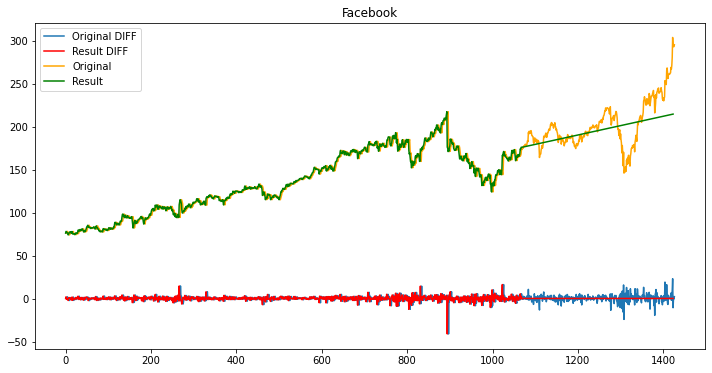

In [26]:
plt.figure(figsize=(12,6))

plt.plot(new_df['Target'], label='Original DIFF')
plt.plot(df_res['Target'], color='red', label='Result DIFF')

plt.plot(original['Target'], color='orange', label='Original')
plt.plot(result_orig, color='green', label='Result')

plt.title('Facebook')
plt.legend()
plt.show()

#### Conclusão

Não foi possível alcançar bons resultados com SVR para previsão de valores baseados em outros valores preditos 